In [3]:
import csv
import os
import scipy.io
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd

In [4]:
folder_to_name = {'bam_overexpression': 'hsbam',
                  'wtF': 'wtF',
                  'wtJ': 'wtJ',
                  '96h': '96h',
                  'dpp_overexpression': 'tj_dpp',
                  'bam_mutants': 'bam',
                  'osk_nogerm': 'osk'
                 }
matrices_dir = "/Users/vickyle/Dropbox/Drosophila_Inferelator_Project (1)"
data_frames = {}

tech = 'cellranger'

for folder in folder_to_name:
    subfolder = folder_to_name[folder]
    matrix_dir = os.path.join(os.path.join(matrices_dir,subfolder), tech)
    mat = scipy.io.mmread(os.path.join(matrix_dir, "matrix.mtx"))
 
    genes_path = os.path.join(matrix_dir, "genes.tsv")
    gene_ids = [row[0] for row in csv.reader(open(genes_path), delimiter="\t")]
    gene_names = [row[1] for row in csv.reader(open(genes_path), delimiter="\t")]
 
    barcodes_path = os.path.join(matrix_dir, "barcodes.tsv")
    barcodes = [row[0] for row in csv.reader(open(barcodes_path), delimiter="\t")]
    arr=mat.toarray()
    df = pd.DataFrame(arr)
    df.index = gene_names
    df.columns = barcodes 
    data_frames[folder] = df

In [83]:
df = data_frames['wtF']

In [84]:
df.head()

,AAACCTGAGAGGACGG-1,AAACCTGAGCCTATGT-1,AAACCTGGTCAAGCGA-1,AAACCTGTCCGCAGTG-1,AAAGATGGTATCACCA-1,AAAGCAAGTAATCACC-1,AAAGCAATCCTTGGTC-1,AAAGTAGCAAGCGCTC-1,AAAGTAGCAGACGCAA-1,AAAGTAGTCCAAAGTC-1,...,TTGGAACTCCTTCAAT-1,TTGGAACTCTGCGACG-1,TTGTAGGCAGACACTT-1,TTTACTGAGAAGAAGC-1,TTTACTGAGGTGCAAC-1,TTTATGCGTAGAAGGA-1,TTTCCTCCACGGCCAT-1,TTTGCGCAGTACGCGA-1,TTTGCGCCATTAGGCT-1,TTTGGTTGTCCCTACT-1
CG11023,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
l(2)gl,1,3,1,0,0,0,0,0,2,3,...,0,0,2,2,0,7,15,2,1,1
Ir21a,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CR43609,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
Cda5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [81]:
df = pd.DataFrame(arr)
df.index = gene_names

In [8]:
df.columns = barcodes

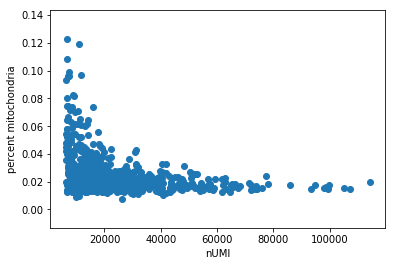

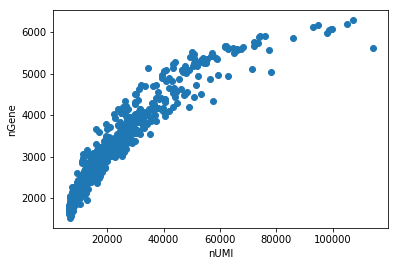

In [96]:
original_len = df.shape[1]
mito_df = df[[x.__contains__("mt:") for x in df.index]]
percent_mito = mito_df.sum(axis=0)/df.sum(axis = 0)
nGene = df[df > 0].count(axis = 0)
nUMI = df.sum(axis = 0)
percent_mito_5percent = percent_mito < 0.08
number_nGene_200 = 200 < nGene 
number_nGene_6000 = nGene < 6000
df_filtered = df.loc[:, percent_mito_5percent & number_nGene_5000 & number_nGene_250]
new_len = df_filtered.shape[1]
plt.scatter(nUMI, percent_mito)
plt.xlabel('nUMI')
plt.ylabel('percent mitochondria')
plt.show()
plt.scatter(nUMI, nGene)
plt.xlabel('nUMI')
plt.ylabel('nGene')
plt.show()

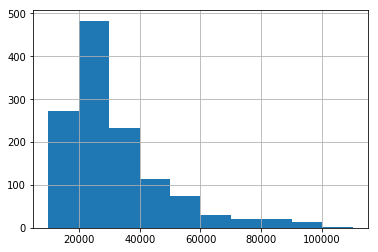

In [87]:
df_filtered.sum(axis = 0).hist()

In [93]:
df_logtransformed = np.log((df_filtered / df_filtered.sum() *  10000) + 1)

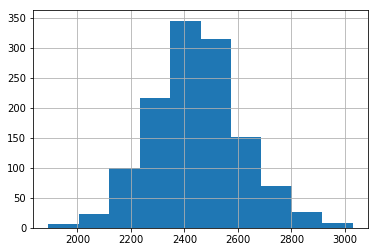

In [94]:
df_logtransformed.sum(axis = 0).hist()